In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import xgboost as XGBClassifier
from sklearn.metrics import make_scorer

## Understanding the Data

In [2]:
data = pd.read_excel("churn_dataset.xls")

In [4]:
data

SubscriptionID            HH Income Home Ownership Ethnicity  \
0           180590686  $  30,000 - $39,999         RENTER    German   
1           181401653        $500,000 Plus          OWNER   unknown   
2           180374685  $100,000 - $124,999          OWNER   Italian   
3           180703483  $200,000 - $249,999          OWNER   English   
4           180358906  $  50,000 - $59,999          OWNER   Italian   
...               ...                  ...            ...       ...   
15850       181313774  $  80,000 - $89,999          OWNER   Italian   
15851       180491046  $  80,000 - $89,999          OWNER   Italian   
15852       120500200  $150,000 - $174,999          OWNER     Irish   
15853       180551649  $  80,000 - $89,999          OWNER  Hispanic   
15854       181401440  $175,000 - $199,999          OWNER  Hispanic   

      dummy for Children  Year Of Residence Age range Language  \
0                      N                  1     25-29   German   
1                      Y                 14     50-54        ?   
2                      Y                  7     45-49  English   
3                      N                 23     55-59  English   
4                      N                 23     60-64  English   
...                  ...                ...       ...      ...   
15850                  N                  3     25-29  English   
15851                  N                  3     25-29  English   
15852                  Y                 12     60-64  English   
15853                  Y                 30         ?  English   
15854                  N                 22     70-74  Spanish   

                 Address State                    City       County  Zip Code  \
0      1 3RD PL UNIT 703    CA              LONG BEACH  LOS ANGELES     90802   
1              1 AVIGNON    CA           NEWPORT COAST       ORANGE     92657   
2            1 BLACKSWAN    CA                  IRVINE       ORANGE     92604   
3         1 BLUE HORIZON    CA           LAGUNA NIGUEL       ORANGE     92677   
4       1 BRISA DEL LAGO    CA  RANCHO SANTA MARGARITA       ORANGE     92688   
...                  ...   ...                     ...          ...       ...   
15850   9973 PETUNIA AVE    CA         FOUNTAIN VALLEY       ORANGE     92708   
15851   9973 PETUNIA AVE    CA         FOUNTAIN VALLEY       ORANGE     92708   
15852   9980 GRINDLAY ST    CA                 CYPRESS       ORANGE     90630   
15853        999 BURR ST    CA                  CORONA    RIVERSIDE     92882   
15854    999 S SEDONA LN    CA                 ANAHEIM       ORANGE     92808   

          weekly fee Deliveryperiod Nielsen Prizm  reward program  \
0      $7.00 - $7.99           7Day            FM               0   
1      $0.01 - $0.50        SunOnly            MW               0   
2      $0.01 - $0.50        SunOnly            MW               0   
3      $1.00 - $1.99        SunOnly            MW               1   
4      $8.00 - $8.99        Thu-Sun            MM               0   
...              ...            ...           ...             ...   
15850  $0.01 - $0.50        SunOnly            MW               0   
15851     $0 - $0.01        SunOnly            MW               0   
15852  $1.00 - $1.99           7Day            MW               0   
15853     $0 - $0.01        SunOnly            FE               0   
15854  $0.01 - $0.50        SunOnly            FW               0   

      Source Channel Subscriber  
0            CircAdm         NO  
1            Partner        YES  
2            Partner        YES  
3           Internet         NO  
4               Crew        YES  
...              ...        ...  
15850        Partner         NO  
15851        Partner         NO  
15852       DirectMl         NO  
15853        Partner         NO  
15854        Partner        YES  

[15855 rows x 19 columns]

In [3]:
data.head()

SubscriptionID            HH Income Home Ownership Ethnicity  \
0       180590686  $  30,000 - $39,999         RENTER    German   
1       181401653        $500,000 Plus          OWNER   unknown   
2       180374685  $100,000 - $124,999          OWNER   Italian   
3       180703483  $200,000 - $249,999          OWNER   English   
4       180358906  $  50,000 - $59,999          OWNER   Italian   

  dummy for Children  Year Of Residence Age range Language            Address  \
0                  N                  1     25-29   German  1 3RD PL UNIT 703   
1                  Y                 14     50-54        ?          1 AVIGNON   
2                  Y                  7     45-49  English        1 BLACKSWAN   
3                  N                 23     55-59  English     1 BLUE HORIZON   
4                  N                 23     60-64  English   1 BRISA DEL LAGO   

  State                    City       County  Zip Code     weekly fee  \
0    CA              LONG BEACH  LOS ANGELES     90802  $7.00 - $7.99   
1    CA           NEWPORT COAST       ORANGE     92657  $0.01 - $0.50   
2    CA                  IRVINE       ORANGE     92604  $0.01 - $0.50   
3    CA           LAGUNA NIGUEL       ORANGE     92677  $1.00 - $1.99   
4    CA  RANCHO SANTA MARGARITA       ORANGE     92688  $8.00 - $8.99   

  Deliveryperiod Nielsen Prizm  reward program Source Channel Subscriber  
0           7Day            FM               0        CircAdm         NO  
1        SunOnly            MW               0        Partner        YES  
2        SunOnly            MW               0        Partner        YES  
3        SunOnly            MW               1       Internet         NO  
4        Thu-Sun            MM               0           Crew        YES

In [4]:
data.tail()

SubscriptionID            HH Income Home Ownership Ethnicity  \
15850       181313774  $  80,000 - $89,999          OWNER   Italian   
15851       180491046  $  80,000 - $89,999          OWNER   Italian   
15852       120500200  $150,000 - $174,999          OWNER     Irish   
15853       180551649  $  80,000 - $89,999          OWNER  Hispanic   
15854       181401440  $175,000 - $199,999          OWNER  Hispanic   

      dummy for Children  Year Of Residence Age range Language  \
15850                  N                  3     25-29  English   
15851                  N                  3     25-29  English   
15852                  Y                 12     60-64  English   
15853                  Y                 30         ?  English   
15854                  N                 22     70-74  Spanish   

                Address State             City     County  Zip Code  \
15850  9973 PETUNIA AVE    CA  FOUNTAIN VALLEY     ORANGE     92708   
15851  9973 PETUNIA AVE    CA  FOUNTAIN VALLEY     ORANGE     92708   
15852  9980 GRINDLAY ST    CA          CYPRESS     ORANGE     90630   
15853       999 BURR ST    CA           CORONA  RIVERSIDE     92882   
15854   999 S SEDONA LN    CA          ANAHEIM     ORANGE     92808   

          weekly fee Deliveryperiod Nielsen Prizm  reward program  \
15850  $0.01 - $0.50        SunOnly            MW               0   
15851     $0 - $0.01        SunOnly            MW               0   
15852  $1.00 - $1.99           7Day            MW               0   
15853     $0 - $0.01        SunOnly            FE               0   
15854  $0.01 - $0.50        SunOnly            FW               0   

      Source Channel Subscriber  
15850        Partner         NO  
15851        Partner         NO  
15852       DirectMl         NO  
15853        Partner         NO  
15854        Partner        YES

In [5]:
data.describe()

SubscriptionID  Year Of Residence      Zip Code  reward program
count    1.585500e+04       15855.000000  15855.000000    15855.000000
mean     1.643729e+08          13.546137  92424.541911        1.100662
std      2.356755e+07          11.770368    733.648427        9.555332
min      1.100011e+08           1.000000  90603.000000        0.000000
25%      1.501824e+08           4.000000  92627.000000        0.000000
50%      1.803333e+08          10.000000  92688.000000        0.000000
75%      1.806362e+08          21.000000  92806.000000        0.000000
max      1.815541e+08          56.000000  92887.000000      353.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15855 non-null  object
 7   Language            15855 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15855 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15855 non-null  object
 16  reward program      15

In [7]:
def bar(feature):
    sns.countplot(x='Subscriber',data=data,hue=feature,palette="flare")
    plt.title(f'Churn rate by {feature}')
    plt.show()
    
def barNum(feature):
    ax = sns.histplot(x = feature, hue = 'Subscriber', data = data, multiple='dodge')
    ax.set(xlabel=feature, ylabel = "Subscriber")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in data:
    barNum(i)
    plt.show()

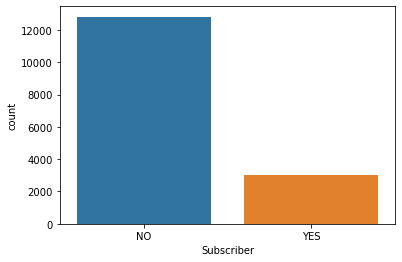

In [9]:
sns.countplot(data=data, x= data["Subscriber"])
plt.show()

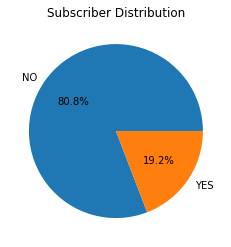

In [10]:
subscriber_counts = data['Subscriber'].value_counts()

sizes = subscriber_counts.values
labels = subscriber_counts.index

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Subscriber Distribution')

plt.show()

## Data Manipulation

In [9]:
data = data.replace({"?": "NaN"})
for col in data.columns:
    data[col] = data[col].replace('NaN', np.nan)

In [10]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15855 non-null  object
 7   Language            15855 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15855 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15855 non-null  object
 16  reward program      15

In [12]:
distinct_customers = len(data['SubscriptionID'].unique())
print('Distinct customers:', distinct_customers)

Distinct customers: 15855


In [13]:
data = data.drop('SubscriptionID', axis=1)

In [14]:
data["Home Ownership"] = data["Home Ownership"].replace({"RENTER": 0, "OWNER": 1})
data["dummy for Children"] = data["dummy for Children"].replace({"N": 0, "Y": 1})

def get_dummies_residence(value):
    if value >= 0 and value <= 2:
        return "0-2 Residence"
    elif value  >= 3 and value <= 5:
        return "3-5 Residence"
    elif value  >= 6 and value < 10:
        return "6-10 Residence"
    elif value >= 10 and value < 25:
        return "10-24 Residence"
    else:
        return "25+ Residence"

data["Year Of Residence"] = data["Year Of Residence"].apply(get_dummies_residence)
data = data.drop('Address', axis=1)
data = data.drop('State', axis=1)

In [15]:
region_mapping = {
    'German': 'West Europe',
    'unknown': 'Unknown',
    'Italian': 'West Europe',
    'English': 'West Europe',
    'Scottish (Scotch)': 'West Europe',
    'Hispanic': 'Latin America',
    'Chinese': 'East Asia',
    'Irish': 'West Europe',
    'Swedish': 'West Europe',
    'Filipino (Philippine)': 'Southeast Asia',
    'Jewish': 'Middle East',
    'Arab': 'Middle East',
    'Japanese': 'East Asia',
    'Indian': 'South Asia',
    'Vietnamese': 'Southeast Asia',
    'Persian': 'Middle East',
    'French': 'West Europe',
    'Korean': 'East Asia',
    'Turkish': 'Middle East',
    'Norwegian': 'West Europe',
    'Armenian': 'Middle East',
    'Austrian': 'West Europe',
    'Polish': 'East Europe',
    'Portuguese': 'West Europe',
    'Dutch': 'West Europe',
    'Welsh': 'West Europe',
    'Belgian': 'West Europe',
    'Byelorussian (Belarusian)': 'East Europe',
    'Czech': 'East Europe',
    'Thai': 'Southeast Asia',
    'Ukrainian': 'East Europe',
    'African (other)': 'Africa',
    'Danish': 'West Europe',
    'Native American (American Indian)': 'North America',
    'Zimbabwean': 'Africa',
    'Hungarian': 'East Europe',
    'Russian': 'East Europe',
    'Pakistani': 'South Asia',
    'Greek': 'West Europe',
    'Khmer': 'Southeast Asia',
    'Lithuanian': 'East Europe',
    'Romanian': 'East Europe',
    'African American 95%+': 'Africa',
    'Egyptian': 'Africa',
    'Finnish': 'West Europe',
    'Ethiopian': 'Africa',
    'multi-ethnic': 'Unknown',
    'Slovakian (Slovak)': 'East Europe',
    'Serbian': 'East Europe',
    'Swiss': 'West Europe',
    'Laotian': 'Southeast Asia',
    'Ugandan': 'Africa',
    'Croatian': 'East Europe',
    'Ruandan (Rwandan)': 'Africa',
    'Malawian': 'Africa',
    'Indonesian': 'Southeast Asia',
    'Angolan': 'Africa',
    'Latvian': 'East Europe',
    'Iraqi': 'Middle East',
    'Hawaiian': 'Oceania',
    'Syrian': 'Middle East',
    'Luxembourgian': 'West Europe',
    'Albanian': 'East Europe',
    'Ghanaian': 'Africa',
    'Slovenian (Slovene)': 'East Europe',
    'Kenyan': 'Africa',
    'Myanmar (Burma)': 'Southeast Asia',
    'Bulgarian': 'East Europe',
    'Bhutanese': 'South Asia',
    'Swaziland': 'West Europe',
    'Nigerian': 'Africa',
    'Estonian': 'East Europe',
    'Zairian (Democratic Republic of the Con': 'Africa'
}

data["Region"] = data["Ethnicity"].map(region_mapping)
data = data.drop("Ethnicity", axis=1)

In [16]:
data["Deliveryperiod"] = data["Deliveryperiod"].replace({"7DAY": "7Day", "7day": "7Day"})
data["Deliveryperiod"] = data["Deliveryperiod"].replace({"THU-SUN": "Thu-Sun", "thu-sun": "Thu-Sun"})
data["Deliveryperiod"] = data["Deliveryperiod"].replace({"SUNONLY": "SunOnly", "sunonly": "SunOnly"})
data["Subscriber"] = data["Subscriber"].replace({"NO": 0, "YES": 1})

In [17]:
data["Source Channel"].unique()

array(['CircAdm', 'Partner', 'Internet', 'Crew', 'Kiosk', 'SCinsert',
       'TeleIn', 'CustCall', 'RetenIn', 'DirectMl', 'TeleOut', 'VRU',
       'Kiosk1', 'System', 'Chat', 'AdvAdm', 'TMC', 'Crew1', 'Email',
       'RetenOut', 'InPaper', 'Kiosk4', 'Assoc', 'Event', 'Kiosk2',
       'OutMedia', 'Internt4', 'PARTNER', 'Crew4', 'Kiosk5', 'Counter',
       'Event1', 'FUSS', 'Crew3', 'Crew2', 'INTERNET', 'CSR', 'DIRECTM2',
       'EMAIL4', 'iSrvices', 'DIRECTM4', 'Kiosk3', 'RetMail', 'Gift',
       'SCINSRT4', 'Agent', 'SCINSRT6', 'ExecAdm', 'Contest', 'CCAuto',
       'DTI'], dtype=object)

In [18]:
data["Source Channel"] = data["Source Channel"].replace({"Kiosk1": "Kiosk", "Kiosk2": "Kiosk",
                                                        "Kiosk3": "Kiosk", "Kiosk4": "Kiosk",
                                                        "Kiosk5": "Kiosk"})

data["Source Channel"] = data["Source Channel"].replace({"Crew1": "Crew", "Crew2": "Crew",
                                                        "Crew3": "Crew", "Crew4": "Crew"})

data["Source Channel"] = data["Source Channel"].replace({"SCINSRT4": "SCinsert", "SCINSRT6": "SCinsert",
                                                        "EMAIL4": "Email", "PARTNER": "Partner",
                                                        "DirectMl": "Direct", "DIRECTM2": "Direct",
                                                        "DIRECTM4": "Direct","INTERNET": "Internet",
                                                        "Internt4": "Internet","Event1": "Event",
                                                         "CircAdm": "Adm","ExecAdm": "Adm",
                                                        "AdvAdm": "Adm"})

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HH Income           15855 non-null  object
 1   Home Ownership      15855 non-null  int64 
 2   dummy for Children  15855 non-null  int64 
 3   Year Of Residence   15855 non-null  object
 4   Age range           15855 non-null  object
 5   Language            15855 non-null  object
 6   City                15855 non-null  object
 7   County              15855 non-null  object
 8   Zip Code            15855 non-null  int64 
 9   weekly fee          15855 non-null  object
 10  Deliveryperiod      15855 non-null  object
 11  Nielsen Prizm       15855 non-null  object
 12  reward program      15855 non-null  int64 
 13  Source Channel      15855 non-null  object
 14  Subscriber          15855 non-null  int64 
 15  Region              15818 non-null  object
dtypes: int64(5), object(11

In [20]:
data_encoded = pd.get_dummies(data, columns = ["HH Income", "Region","Year Of Residence","Age range","City",
                             "County","Zip Code","weekly fee","Deliveryperiod","Nielsen Prizm","Source Channel"])

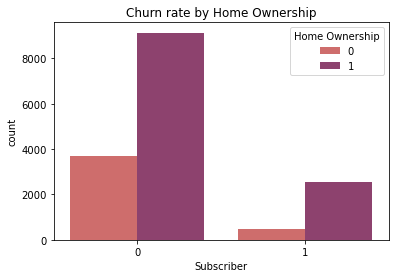

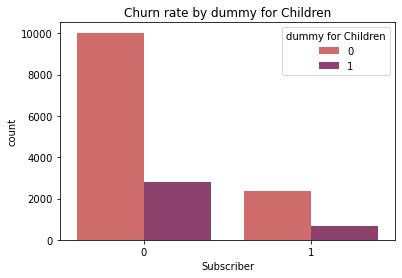

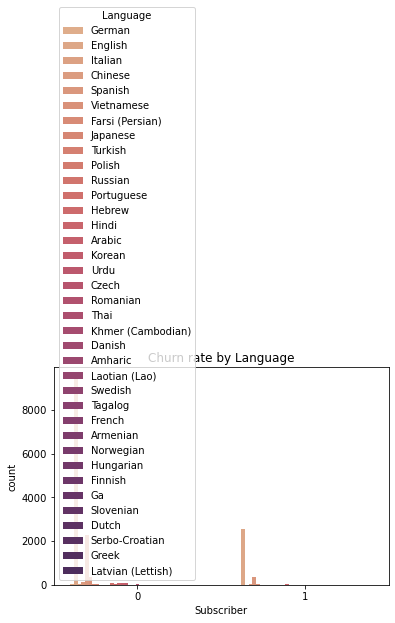

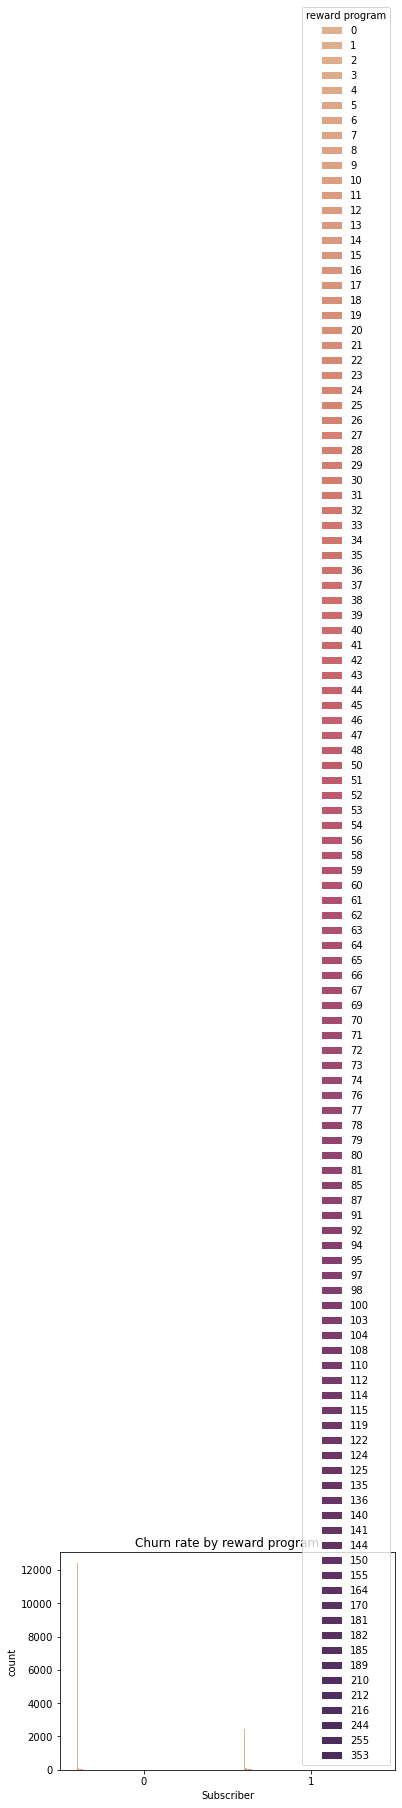

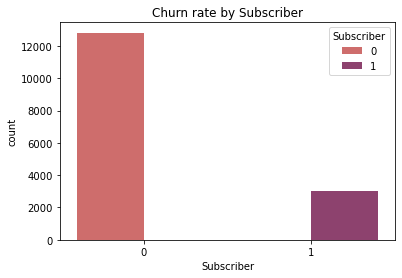

ValueError: Could not interpret input 'HH Income_$  20,000 - $29,999'

In [22]:
for i in data_encoded:
    bar(i)
    plt.show()

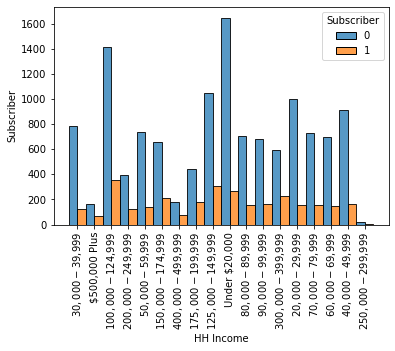

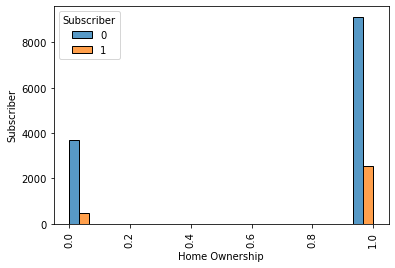

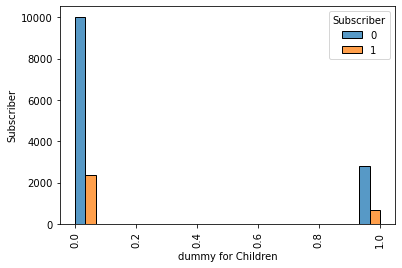

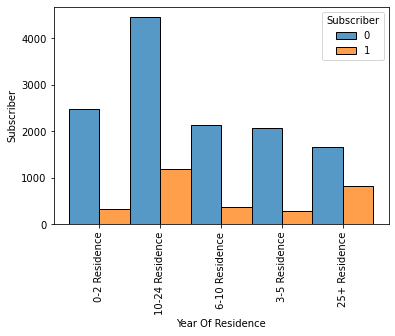

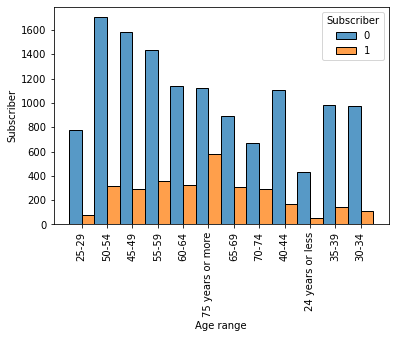

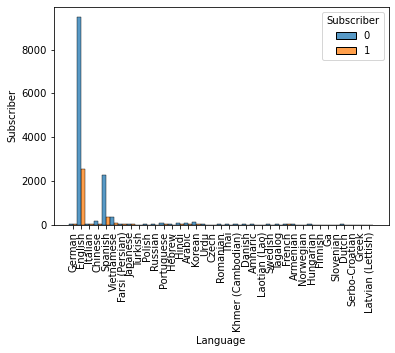

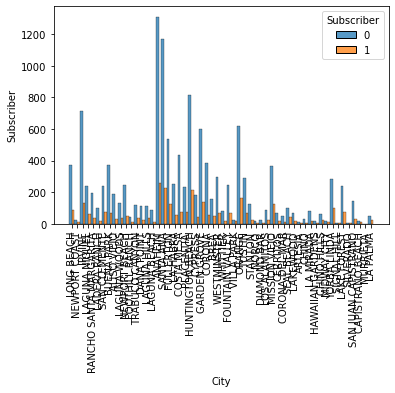

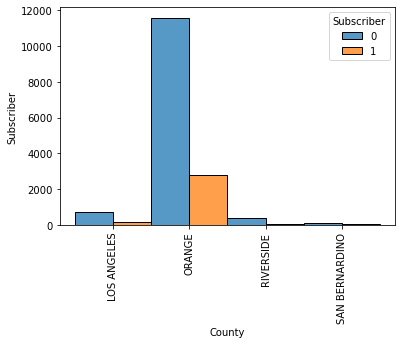

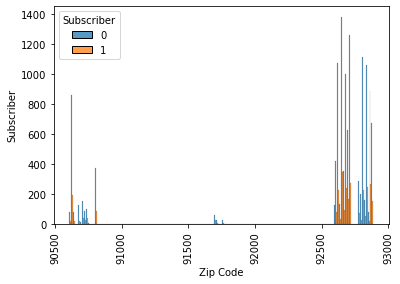

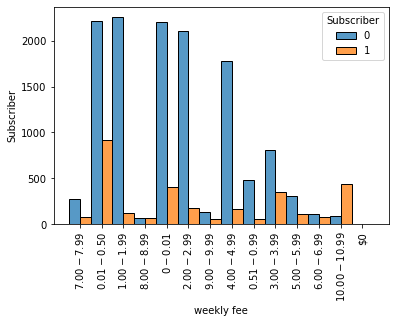

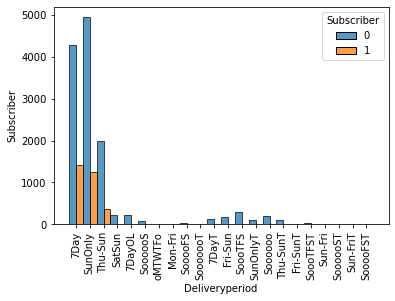

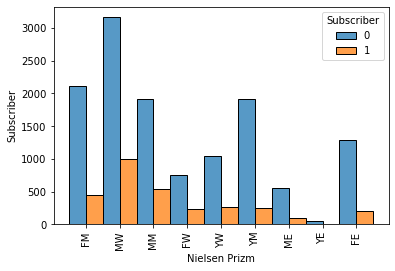

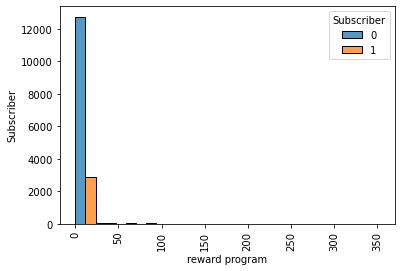

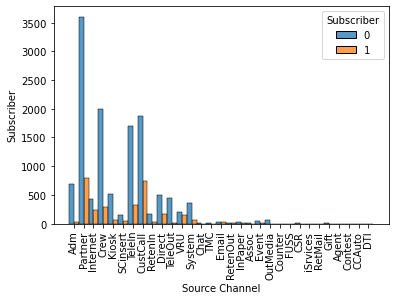

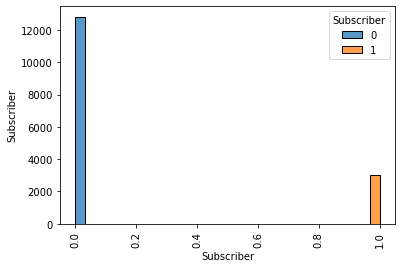

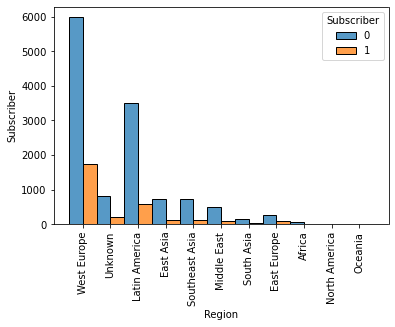

In [23]:
for i in data:
    barNum(i)
    plt.show()

In [23]:
corr = data_encoded.corr()

high_corr = []

for i in range(len(corr.columns)-1):
    corr_list = []
    
    for j in range(len(corr.columns)):
        if corr.iloc[i][j] >= 0.60:
            col_name = corr.columns[j]
            if col_name != corr.columns[i]:
                corr_list.append(col_name)
                
    if corr_list:
        high_corr.append([f"{corr.columns[i]}: {', '.join(corr_list)}"])
        
high_corr

[['City_ALISO VIEJO: Zip Code_92656'],
 ['City_ARTESIA: Zip Code_90701'],
 ['City_BREA: Zip Code_92821'],
 ['City_BUENA PARK: Zip Code_90620'],
 ['City_CAPISTRANO BEACH: Zip Code_92624'],
 ['City_CERRITOS: Zip Code_90703'],
 ['City_CHINO: Zip Code_91710'],
 ['City_CHINO HILLS: County_SAN BERNARDINO, Zip Code_91709'],
 ['City_CORONA: County_RIVERSIDE'],
 ['City_CORONA DEL MAR: Zip Code_92625'],
 ['City_COSTA MESA: Zip Code_92626, Zip Code_92627'],
 ['City_CYPRESS: Zip Code_90630'],
 ['City_DANA POINT: Zip Code_92629'],
 ['City_DIAMOND BAR: Zip Code_91765'],
 ['City_FOOTHILL RANCH: Zip Code_92610'],
 ['City_FOUNTAIN VALLEY: Zip Code_92708'],
 ['City_HAWAIIAN GARDENS: Zip Code_90716'],
 ['City_LA HABRA: Zip Code_90631'],
 ['City_LA MIRADA: Zip Code_90638'],
 ['City_LA PALMA: Zip Code_90623'],
 ['City_LADERA RANCH: Zip Code_92694'],
 ['City_LAGUNA BEACH: Zip Code_92651'],
 ['City_LAGUNA HILLS: Zip Code_92653'],
 ['City_LAGUNA NIGUEL: Zip Code_92677'],
 ['City_LAGUNA WOODS: Zip Code_92637']

In [24]:
data = data.drop('City', axis=1)
data = data.drop('Zip Code', axis=1)

In [25]:
data = data.drop('Language', axis=1)

In [26]:
data_encoded = pd.get_dummies(data)

In [27]:
corr = data_encoded.corr()

high_corr = []

for i in range(len(corr.columns)-1):
    corr_list = []
    
    for j in range(len(corr.columns)):
        if corr.iloc[i][j] >= 0.60:
            col_name = corr.columns[j]
            if col_name != corr.columns[i]:
                corr_list.append(col_name)
                
    if corr_list:
        high_corr.append([f"{corr.columns[i]}: {', '.join(corr_list)}"])
        
high_corr

[['weekly fee_$0 - $0.01: Source Channel_Partner'],
 ['Deliveryperiod_SunOnly: Source Channel_Partner'],
 ['Source Channel_Partner: weekly fee_$0 - $0.01, Deliveryperiod_SunOnly']]

## Data Visualization

In [ ]:
sns.countplot(data=data_encoded, x= data_encoded["Subscriber"])
plt.show()

In [28]:
data["HH Income"].unique()

array(['$  30,000 - $39,999', '$500,000 Plus', '$100,000 - $124,999',
       '$200,000 - $249,999', '$  50,000 - $59,999',
       '$150,000 - $174,999', '$400,000 - $499,999',
       '$175,000 - $199,999', '$125,000 - $149,999', 'Under $20,000',
       '$  80,000 - $89,999', '$  90,000 - $99,999',
       '$300,000 - $399,999', '$  20,000 - $29,999',
       '$  70,000 - $79,999', '$  60,000 - $69,999',
       '$  40,000 - $49,999', '$250,000 - $299,999'], dtype=object)

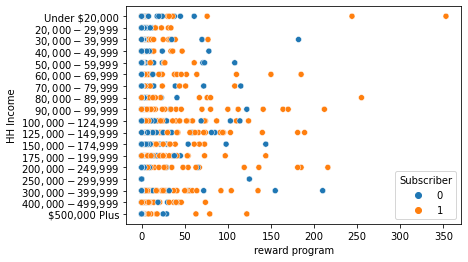

In [31]:

sorting_order = {
    'Under $20,000': 1,
    '$  20,000 - $29,999': 2,
    '$  30,000 - $39,999': 3,
    '$  40,000 - $49,999': 4,
    '$  50,000 - $59,999': 5,
    '$  60,000 - $69,999': 6,
    '$  70,000 - $79,999': 7,
    '$  80,000 - $89,999': 8,
    '$  90,000 - $99,999': 9,
    '$100,000 - $124,999': 10,
    '$125,000 - $149,999': 11,
    '$150,000 - $174,999': 12,
    '$175,000 - $199,999': 13,
    '$200,000 - $249,999': 14,
    '$250,000 - $299,999': 15,
    '$300,000 - $399,999': 16,
    '$400,000 - $499,999': 17,
    '$500,000 Plus': 18
}

sorted_data = data.sort_values('HH Income', key=lambda x: x.map(sorting_order))

sns.scatterplot(data=sorted_data, x='reward program', y='HH Income', hue='Subscriber')
plt.show()


<AxesSubplot:xlabel='Subscriber', ylabel='Year Of Residence'>

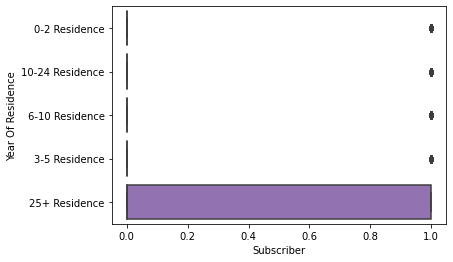

In [25]:
sns.boxplot(x='Subscriber', y='Year Of Residence', data = data)

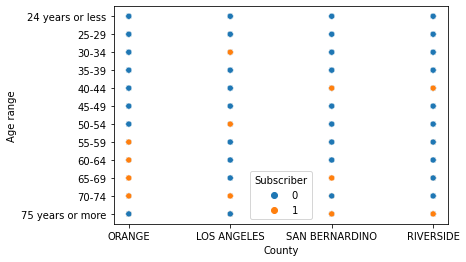

In [26]:
sorting_numbers = {
    '24 years or less': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75 years or more': 12
}

data_sorted = data.sort_values('Age range', key=lambda x: x.map(sorting_numbers))


sns.scatterplot(data=data_sorted, x='County', y='Age range', hue='Subscriber')
plt.show()


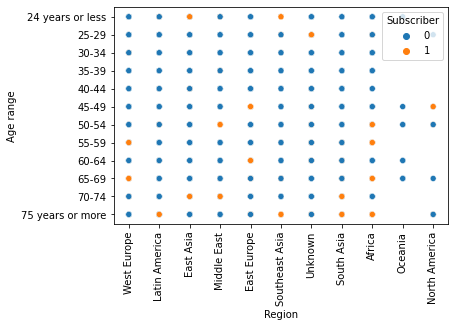

In [27]:
sorting_numbers = {
    '24 years or less': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75 years or more': 12
}

data_sorted = data.sort_values('Age range', key=lambda x: x.map(sorting_numbers))


sns.scatterplot(data=data_sorted, x='Region', y='Age range', hue='Subscriber')
plt.xticks(rotation=90)
plt.show()

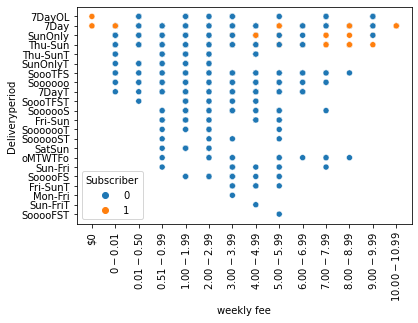

In [28]:
sorting_numbers = {
    '$0': 1,
    '$0 - $0.01': 2,
    '$0.01 - $0.50': 3,
    '$0.51 - $0.99': 4,
    '$1.00 - $1.99': 5,
    '$2.00 - $2.99': 6,
    '$3.00 - $3.99': 7,
    '$4.00 - $4.99': 8,
    '$5.00 - $5.99': 9,
    '$6.00 - $6.99': 10,
    '$7.00 - $7.99': 11,
    '$8.00 - $8.99': 12,
    '$9.00 - $9.99': 13,
    '$10.00 - $10.99': 14
}

data_sorted = data.sort_values('weekly fee', key=lambda x: x.map(sorting_numbers))


sns.scatterplot(data=data_sorted, x='weekly fee', y='Deliveryperiod', hue='Subscriber')
plt.xticks(rotation=90)
plt.show()

## Modeling

In [29]:
X = data_encoded.drop('Subscriber', axis=1)
y = data_encoded["Subscriber"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
def model(X_train, y_train, X_test, y_test):
    
    lr = LogisticRegression(max_iter=1000)
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    gb = GradientBoostingClassifier()
    bag = BaggingClassifier(base_estimator=dt)
    rf = RandomForestClassifier()
    
    models = {"Logistic Regression": lr, "Decision Tree": dt, "KNN": knn, 
              "Gradient Boosting": gb,"Bagging Classifier": bag,
             "Random Forest": rf}
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        results[name] = {
            "Accuracy Score" : accuracy_score(y_test, y_pred_test),
            "AUC Score": roc_auc_score(y_test, y_pred_test),
            "AUC Score Prob": roc_auc_score(y_test, y_pred_prob),
            "F1 Score": f1_score(y_test, y_pred_test),
            "Precision Score": precision_score(y_test, y_pred_test),
            "Recall Score": recall_score(y_test, y_pred_test)
        }
        
    for name, metrics in results.items():
        print("Model: {}".format(name))
        for metric_name, metric_value in metrics.items():
            print("{}: {}".format(metric_name, metric_value))
        print()
    best_models = {}
    for metric_name in ["Accuracy Score","AUC Score", "F1 Score","AUC Score Prob","Precision Score","Recall Score"]:
        best_models[metric_name] = max(results, key=lambda x: results[x][metric_name])
    
    cv_mean_auc = {}
    cv_mean_f1 = {}
    for name, model in models.items():
        scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
        cv_mean_auc[name] = scores_auc.mean()

        
    return best_models, cv_mean_auc, results

In [46]:
#Choosing the best model
best_models, cv_mean_auc, results = model(X_train, y_train, X_test, y_test)
print("Best models based on each metric: {}".format(best_models))

Model: Logistic Regression
Accuracy Score: 0.8388520971302428
AUC Score: 0.6308756820721847
AUC Score Prob: 0.8236175082747582
F1 Score: 0.40650406504065045
Precision Score: 0.6097560975609756
Recall Score: 0.3048780487804878

Model: Decision Tree
Accuracy Score: 0.8032166508987701
AUC Score: 0.667475135475267
AUC Score Prob: 0.6707135947535283
F1 Score: 0.4554973821989529
Precision Score: 0.4562937062937063
Recall Score: 0.4547038327526132

Model: KNN
Accuracy Score: 0.8356985178177231
AUC Score: 0.658128046432563
AUC Score Prob: 0.7635720121984761
F1 Score: 0.4555903866248694
Precision Score: 0.5691906005221932
Recall Score: 0.3797909407665505

Model: Gradient Boosting
Accuracy Score: 0.8527278461053296
AUC Score: 0.6481681489899227
AUC Score Prob: 0.8444774793751569
F1 Score: 0.4460260972716488
Precision Score: 0.6988847583643123
Recall Score: 0.32752613240418116

Model: Bagging Classifier
Accuracy Score: 0.8385367391989909
AUC Score: 0.6652892173896711
AUC Score Prob: 0.79911758273

## Hyperparameter Tuning

In [52]:
scoring = {
    'AUC': 'roc_auc',
    'F1 Score': 'f1',
    'Precision': make_scorer(precision_score, zero_division=1),
    'Recall': 'recall'
}

In [53]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)
gb_cv_auc = GridSearchCV(gb, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')


gb_cv_auc.fit(X_train, y_train)

print("Gradient Boosting")
print("Best parameters of AUC:", gb_cv_auc.best_params_)
print("Best score of AUC:", gb_cv_auc.best_score_)
print("Best score of F1 Score: ", gb_cv_auc.cv_results_['mean_test_F1 Score'][gb_cv_auc.best_index_])
print("Best score of Precision: ", gb_cv_auc.cv_results_['mean_test_Precision'][gb_cv_auc.best_index_])
print("Best score of Recall: ", gb_cv_auc.cv_results_['mean_test_Recall'][gb_cv_auc.best_index_])

Gradient Boosting
Best parameters of AUC: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score of AUC: 0.8610514291915987
Best score of F1 Score:  0.5194364091938203
Best score of Precision:  0.7335685655951614
Best score of Recall:  0.40276884513267036


In [56]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
}

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

bag_cv_auc = GridSearchCV(bag, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')

bag_cv_auc.fit(X_train, y_train)

print("Bagging Classifier")
print("Best parameters of AUC: ", bag_cv_auc.best_params_)
print("Best score of AUC: ", bag_cv_auc.best_score_)
print("Best score of F1 Score: ", bag_cv_auc.cv_results_['mean_test_F1 Score'][bag_cv_auc.best_index_])
print("Best score of Precision: ", bag_cv_auc.cv_results_['mean_test_Precision'][bag_cv_auc.best_index_])
print("Best score of Recall: ", bag_cv_auc.cv_results_['mean_test_Recall'][bag_cv_auc.best_index_])

Bagging Classifier
Best parameters of AUC:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best score of AUC:  0.8404731285077514
Best score of F1 Score:  0.5269236493611256
Best score of Precision:  0.6730547658683045
Best score of Recall:  0.4336252246903808


In [57]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt = DecisionTreeClassifier(random_state=42)

dt_cv_auc = GridSearchCV(dt, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')

dt_cv_auc.fit(X_train, y_train)

print("Decision Tree")
print("Best parameters of AUC: ", dt_cv_auc.best_params_)
print("Best score of AUC: ", dt_cv_auc.best_score_)
print("Best score of F1 Score: ", bag_cv_auc.cv_results_['mean_test_F1 Score'][bag_cv_auc.best_index_])
print("Best score of Precision: ", bag_cv_auc.cv_results_['mean_test_Precision'][bag_cv_auc.best_index_])
print("Best score of Recall: ", bag_cv_auc.cv_results_['mean_test_Recall'][bag_cv_auc.best_index_])

Decision Tree
Best parameters of AUC:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score of AUC:  0.8104757462411305
Best score of F1 Score:  0.5269236493611256
Best score of Precision:  0.6730547658683045
Best score of Recall:  0.4336252246903808


In [59]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

knn = KNeighborsClassifier()

knn_cv_auc = GridSearchCV(knn, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')


knn_cv_auc.fit(X_train, y_train)

print("KNN")
print("Best parameters of AUC: ", knn_cv_auc.best_params_)
print("Best score of AUC: ", knn_cv_auc.best_score_)
print("Best score of F1 Score: ", knn_cv_auc.cv_results_['mean_test_F1 Score'][knn_cv_auc.best_index_])
print("Best score of Precision: ", knn_cv_auc.cv_results_['mean_test_Precision'][knn_cv_auc.best_index_])
print("Best score of Recall: ", knn_cv_auc.cv_results_['mean_test_Recall'][knn_cv_auc.best_index_])

KNN
Best parameters of AUC:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best score of AUC:  0.7815601972215639
Best score of F1 Score:  0.45048933553913395
Best score of Precision:  0.6432091704544278
Best score of Recall:  0.3471528224410033


In [63]:
param_grid = {
    "C": [0.001, 0.01, 0.1],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

lr = LogisticRegression(max_iter=3000, random_state=42)

lr_cv_auc = GridSearchCV(lr, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')

lr_cv_auc.fit(X_train, y_train)

print("Logistic Regression")
print("Best parameters of AUC: ", lr_cv_auc.best_params_)
print("Best score of AUC: ", lr_cv_auc.best_score_)
print("Best score of F1 Score: ", lr_cv_auc.cv_results_['mean_test_F1 Score'][lr_cv_auc.best_index_])
print("Best score of Precision: ", lr_cv_auc.cv_results_['mean_test_Precision'][lr_cv_auc.best_index_])
print("Best score of Recall: ", lr_cv_auc.cv_results_['mean_test_Recall'][lr_cv_auc.best_index_])

Logistic Regression
Best parameters of AUC:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score of AUC:  0.8240377573229528
Best score of F1 Score:  0.41207034628677325
Best score of Precision:  0.7205906504203011
Best score of Recall:  0.28867065749765003


In [64]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7]
}

rf = RandomForestClassifier(random_state=42)
rf_cv_auc = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')
rf_cv_auc.fit(X_train, y_train)

print("Random Forest")
print("Best parameters of AUC:", rf_cv_auc.best_params_)
print("Best score of AUC:", rf_cv_auc.best_score_)
print("Best score of F1 Score: ", rf_cv_auc.cv_results_['mean_test_F1 Score'][rf_cv_auc.best_index_])
print("Best score of Precision: ", rf_cv_auc.cv_results_['mean_test_Precision'][rf_cv_auc.best_index_])
print("Best score of Recall: ", rf_cv_auc.cv_results_['mean_test_Recall'][rf_cv_auc.best_index_])


Random Forest
Best parameters of AUC: {'max_depth': 7, 'n_estimators': 200}
Best score of AUC: 0.8386682750189177
Best score of F1 Score:  0.25869838931553213
Best score of Precision:  0.8630835082136855
Best score of Recall:  0.15225432477448506


## Feature Selection

In [113]:
alphas = np.logspace(-6, -0.5, 30)

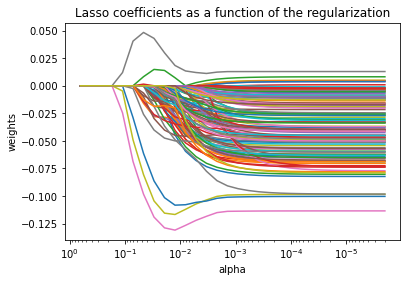

In [114]:
from sklearn.preprocessing import scale 

lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [143]:
lasso = Lasso(alpha=0.001)

lasso.fit(X, y)

coefficients = lasso.coef_
feature_names = X.columns

selected_features = feature_names[coefficients != 0]

print("Selected Features:", selected_features)

Selected Features: Index(['Home Ownership', 'reward program', 'HH Income_$  20,000 - $29,999',
       'HH Income_$150,000 - $174,999', 'HH Income_$175,000 - $199,999',
       'Year Of Residence_0-2 Residence', 'Year Of Residence_10-24 Residence',
       'Year Of Residence_25+ Residence', 'Year Of Residence_3-5 Residence',
       'Age range_25-29', 'Age range_50-54', 'Age range_60-64',
       'Age range_65-69', 'Age range_70-74', 'Age range_75 years or more',
       'County_RIVERSIDE', 'weekly fee_$0.01 - $0.50',
       'weekly fee_$0.51 - $0.99', 'weekly fee_$1.00 - $1.99',
       'weekly fee_$10.00 - $10.99', 'weekly fee_$2.00 - $2.99',
       'weekly fee_$3.00 - $3.99', 'weekly fee_$4.00 - $4.99',
       'weekly fee_$6.00 - $6.99', 'weekly fee_$7.00 - $7.99',
       'weekly fee_$8.00 - $8.99', 'Deliveryperiod_7Day',
       'Deliveryperiod_7DayOL', 'Deliveryperiod_SunOnly',
       'Deliveryperiod_Thu-Sun', 'Nielsen Prizm_MW', 'Nielsen Prizm_YM',
       'Source Channel_Adm', 'Source Ch

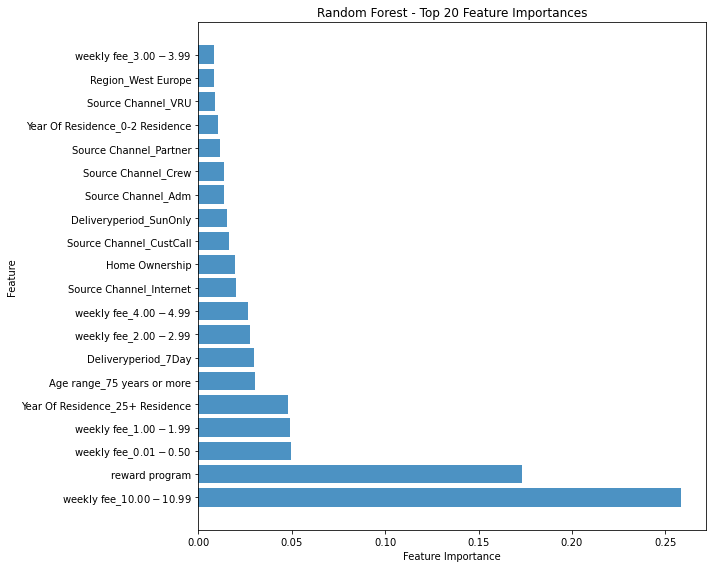

In [93]:
importances = rf_cv_auc.best_estimator_.feature_importances_

feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

top_feature_names = [feature_names[i] for i in indices[:20]]
top_importances = importances[indices[:20]]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_feature_names)), top_importances, align='center', alpha=0.8)
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [144]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)
gb_cv_auc = GridSearchCV(gb, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')


gb_cv_auc.fit(X_train[selected_features], y_train)

print("Gradient Boosting")
print("Best parameters of AUC:", gb_cv_auc.best_params_)
print("Best score of AUC:", gb_cv_auc.best_score_)
print("Best score of F1 Score: ", gb_cv_auc.cv_results_['mean_test_F1 Score'][gb_cv_auc.best_index_])
print("Best score of Precision: ", gb_cv_auc.cv_results_['mean_test_Precision'][gb_cv_auc.best_index_])
print("Best score of Recall: ", gb_cv_auc.cv_results_['mean_test_Recall'][gb_cv_auc.best_index_])

Gradient Boosting
Best parameters of AUC: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score of AUC: 0.9104667920360953
Best score of F1 Score:  0.8309783463792698
Best score of Precision:  0.815551530574259
Best score of Recall:  0.8471076194217286


In [145]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
}

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)

bag_cv_auc = GridSearchCV(bag, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')

bag_cv_auc.fit(X_train[selected_features], y_train)

print("Bagging Classifier")
print("Best parameters of AUC: ", bag_cv_auc.best_params_)
print("Best score of AUC: ", bag_cv_auc.best_score_)
print("Best score of F1 Score: ", bag_cv_auc.cv_results_['mean_test_F1 Score'][bag_cv_auc.best_index_])
print("Best score of Precision: ", bag_cv_auc.cv_results_['mean_test_Precision'][bag_cv_auc.best_index_])
print("Best score of Recall: ", bag_cv_auc.cv_results_['mean_test_Recall'][bag_cv_auc.best_index_])


Bagging Classifier
Best parameters of AUC:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best score of AUC:  0.9085820177934611
Best score of F1 Score:  0.8284629155239271
Best score of Precision:  0.8091771806261449
Best score of Recall:  0.8487659655513099


In [146]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt = DecisionTreeClassifier(random_state=42)

dt_cv_auc = GridSearchCV(dt, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')

dt_cv_auc.fit(X_train[selected_features], y_train)

print("Decision Tree")
print("Best parameters of AUC: ", dt_cv_auc.best_params_)
print("Best score of AUC: ", dt_cv_auc.best_score_)
print("Best score of F1 Score: ", bag_cv_auc.cv_results_['mean_test_F1 Score'][bag_cv_auc.best_index_])
print("Best score of Precision: ", bag_cv_auc.cv_results_['mean_test_Precision'][bag_cv_auc.best_index_])
print("Best score of Recall: ", bag_cv_auc.cv_results_['mean_test_Recall'][bag_cv_auc.best_index_])

Decision Tree
Best parameters of AUC:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score of AUC:  0.8411641648986071
Best score of F1 Score:  0.8284629155239271
Best score of Precision:  0.8091771806261449
Best score of Recall:  0.8487659655513099


In [147]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

knn = KNeighborsClassifier()

knn_cv_auc = GridSearchCV(knn, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')


knn_cv_auc.fit(X_train[selected_features], y_train)

print("KNN")
print("Best parameters of AUC: ", knn_cv_auc.best_params_)
print("Best score of AUC: ", knn_cv_auc.best_score_)
print("Best score of F1 Score: ", knn_cv_auc.cv_results_['mean_test_F1 Score'][knn_cv_auc.best_index_])
print("Best score of Precision: ", knn_cv_auc.cv_results_['mean_test_Precision'][knn_cv_auc.best_index_])
print("Best score of Recall: ", knn_cv_auc.cv_results_['mean_test_Recall'][knn_cv_auc.best_index_])

KNN
Best parameters of AUC:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best score of AUC:  0.8766088326475276
Best score of F1 Score:  0.8071443996098612
Best score of Precision:  0.7450452513958747
Best score of Recall:  0.8805736052089657


In [148]:
param_grid = {
    "C": [0.001, 0.01, 0.1],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

lr = LogisticRegression(max_iter=3000, random_state=42)

lr_cv_auc = GridSearchCV(lr, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')

lr_cv_auc.fit(X_train[selected_features], y_train)

print("Logistic Regression")
print("Best parameters of AUC: ", lr_cv_auc.best_params_)
print("Best score of AUC: ", lr_cv_auc.best_score_)
print("Best score of F1 Score: ", lr_cv_auc.cv_results_['mean_test_F1 Score'][lr_cv_auc.best_index_])
print("Best score of Precision: ", lr_cv_auc.cv_results_['mean_test_Precision'][lr_cv_auc.best_index_])
print("Best score of Recall: ", lr_cv_auc.cv_results_['mean_test_Recall'][lr_cv_auc.best_index_])

Logistic Regression
Best parameters of AUC:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score of AUC:  0.8720160877999554
Best score of F1 Score:  0.7822125738433375
Best score of Precision:  0.778508138388939
Best score of Recall:  0.7861267245176112


In [149]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7]
}

rf = RandomForestClassifier(random_state=42)
rf_cv_auc = GridSearchCV(rf, param_grid, scoring=scoring, cv=5, n_jobs=-1, refit='AUC')
rf_cv_auc.fit(X_train[selected_features], y_train)

print("Random Forest")
print("Best parameters of AUC:", rf_cv_auc.best_params_)
print("Best score of AUC:", rf_cv_auc.best_score_)
print("Best score of F1 Score: ", rf_cv_auc.cv_results_['mean_test_F1 Score'][rf_cv_auc.best_index_])
print("Best score of Precision: ", rf_cv_auc.cv_results_['mean_test_Precision'][rf_cv_auc.best_index_])
print("Best score of Recall: ", rf_cv_auc.cv_results_['mean_test_Recall'][rf_cv_auc.best_index_])

Random Forest
Best parameters of AUC: {'max_depth': 7, 'n_estimators': 200}
Best score of AUC: 0.8669952999293866
Best score of F1 Score:  0.7867694341841066
Best score of Precision:  0.7380388044860859
Best score of Recall:  0.8425221107262317
